In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pricing-discount-dataset/fashion_pricing_discount_dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/fashion-pricing-discount-dataset/fashion_pricing_discount_dataset.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fashion-pricing-discount-dataset/fashion_pricing_discount_dataset.csv'

In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/pricing-discount-dataset/fashion_pricing_discount_dataset.csv")
df.head()


,customer_id,product_category,base_price,discount_percentage,promotion_exposure,season,final_price,purchase_frequency,avg_order_value
0,1,Footwear,2470,10,6,Sale,2223.0,3,2032.559422
1,2,Accessories,4322,0,3,Sale,4322.0,6,4262.151680
2,3,Men Apparel,3319,40,6,Sale,1991.4,2,1976.669476
3,4,Footwear,1402,10,4,Sale,1261.8,3,1511.951107
4,5,Footwear,864,10,1,Non-Sale,777.6,1,753.106797


In [4]:
df.shape


(5000, 9)

In [5]:
df.describe()


,customer_id,base_price,discount_percentage,promotion_exposure,final_price,purchase_frequency,avg_order_value
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2760.496800,21.22800,4.481600,2174.021620,2.867200,2171.948698
std,1443.520003,1291.970994,14.02039,2.893603,1102.217458,1.588732,1135.355453
min,1.000000,501.000000,0.00000,0.000000,260.500000,0.000000,200.000000
25%,1250.750000,1616.000000,10.00000,2.000000,1255.150000,2.000000,1233.902242
50%,2500.500000,2786.500000,20.00000,5.000000,2104.900000,3.000000,2078.153360
75%,3750.250000,3873.000000,30.00000,7.000000,3005.800000,4.000000,3036.063189
max,5000.000000,4998.000000,50.00000,9.000000,4992.000000,10.000000,5485.046041


In [6]:
df["discount_percentage"].value_counts()


discount_percentage
20    1303
10    1006
30     961
40     776
0      751
50     203
Name: count, dtype: int64

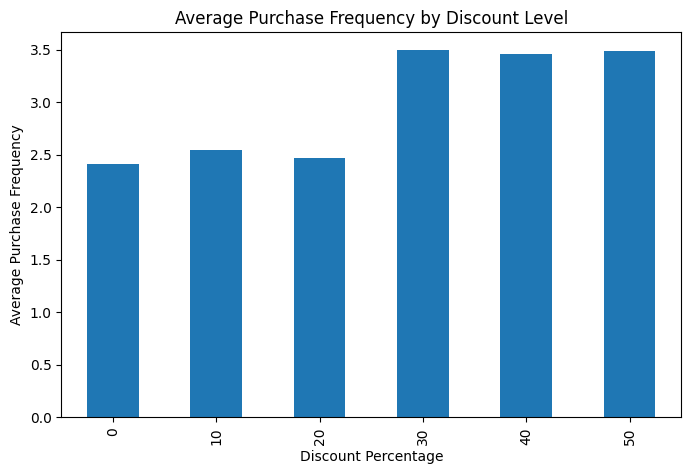

In [7]:
import matplotlib.pyplot as plt

df.groupby("discount_percentage")["purchase_frequency"].mean().plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Average Purchase Frequency by Discount Level")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Purchase Frequency")
plt.show()


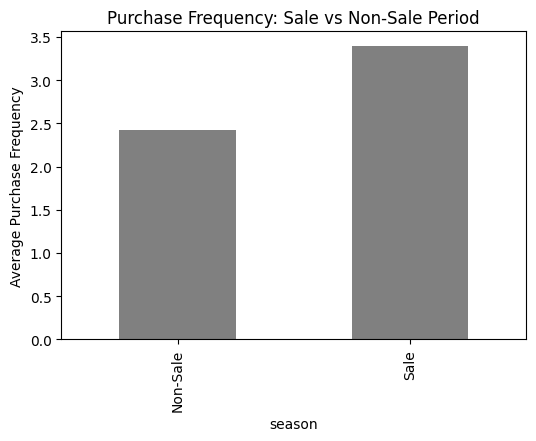

In [8]:
df.groupby("season")["purchase_frequency"].mean().plot(
    kind="bar",
    color="gray",
    figsize=(6,4)
)

plt.title("Purchase Frequency: Sale vs Non-Sale Period")
plt.ylabel("Average Purchase Frequency")
plt.show()


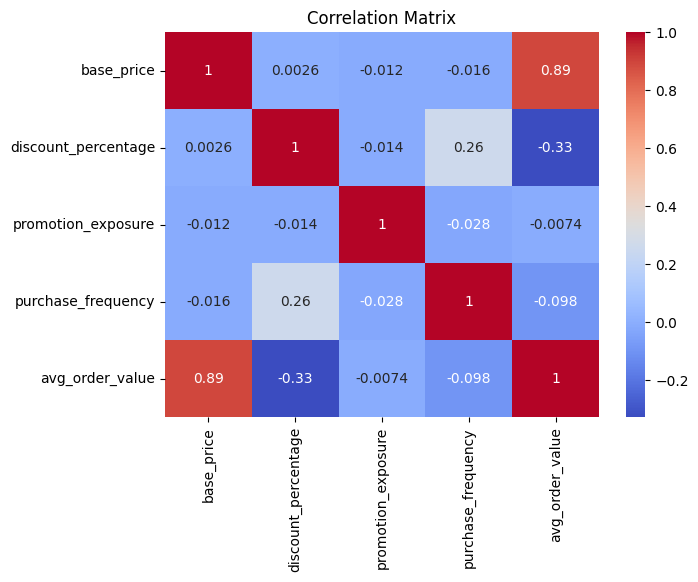

In [9]:
import seaborn as sns

corr = df[
    ["base_price", "discount_percentage", "promotion_exposure",
     "purchase_frequency", "avg_order_value"]
].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [10]:
import statsmodels.api as sm

X = df[["base_price", "discount_percentage", "promotion_exposure"]]
X = sm.add_constant(X)

y = df["purchase_frequency"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     purchase_frequency   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           3.79e-77
Time:                        12:23:29   Log-Likelihood:                -9230.1
No. Observations:                5000   AIC:                         1.847e+04
Df Residuals:                    4996   BIC:                         1.849e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3586    